In [1]:
from google.colab import files
uploaded = files.upload()

Saving flipkart_sales.csv to flipkart_sales.csv


In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [3]:
FS = pd.read_csv("flipkart_sales.csv")

In [4]:
FS.head(5)

,Order ID,Product Name,Category,Price (INR),Quantity Sold,Total Sales (INR),Order Date,Payment Method,Customer Rating
0,ORD00001,Educational Book,Books,49069.56,2,98139.12,2024-09-12,Debit Card,3.5
1,ORD00002,Jeans,Clothing,12755.85,4,51023.40,2024-12-18,UPI,3.9
2,ORD00003,Face Cream,Beauty,11092.19,4,44368.76,2024-05-18,Debit Card,4.4
3,ORD00004,Smartwatch,Electronics,32657.81,1,32657.81,2024-11-08,Debit Card,3.2
4,ORD00005,Cookware Set,Home & Kitchen,26590.08,3,79770.24,2024-12-27,UPI,3.1


In [9]:
FS.tail(5)

,Order ID,Product Name,Category,Price (INR),Quantity Sold,Total Sales (INR),Order Date,Payment Method,Customer Rating
995,ORD00996,Smartphone,Electronics,28995.81,3,86987.43,2025-01-13,COD,5.0
996,ORD00997,Perfume,Beauty,32799.51,2,65599.02,2024-12-18,Wallet,2.4
997,ORD00998,Face Cream,Beauty,40840.80,1,40840.80,2024-07-26,UPI,3.1
998,ORD00999,Cookware Set,Home & Kitchen,34741.79,4,138967.16,2024-10-02,Net Banking,3.2
999,ORD01000,Table Lamp,Home & Kitchen,16698.12,4,66792.48,2024-03-26,Credit Card,1.6


In [5]:
FS.describe()

,Price (INR),Quantity Sold,Total Sales (INR),Customer Rating
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,24520.258260,3.097000,75213.112740,3.011100
std,14187.611227,1.410525,59457.598352,1.145408
min,139.850000,1.000000,419.550000,1.000000
25%,12378.905000,2.000000,28581.765000,2.000000
50%,24650.015000,3.000000,57358.300000,3.100000
75%,35981.925000,4.000000,110618.595000,4.000000
max,49911.750000,5.000000,243903.900000,5.000000


In [6]:
FS.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Order ID           1000 non-null   object 
 1   Product Name       1000 non-null   object 
 2   Category           1000 non-null   object 
 3   Price (INR)        1000 non-null   float64
 4   Quantity Sold      1000 non-null   int64  
 5   Total Sales (INR)  1000 non-null   float64
 6   Order Date         1000 non-null   object 
 7   Payment Method     1000 non-null   object 
 8   Customer Rating    1000 non-null   float64
dtypes: float64(3), int64(1), object(5)
memory usage: 70.4+ KB


In [7]:
FS.isnull().sum()

,0
Order ID,0
Product Name,0
Category,0
Price (INR),0
Quantity Sold,0
Total Sales (INR),0
Order Date,0
Payment Method,0
Customer Rating,0


In [8]:
FS.value_counts

<bound method DataFrame.value_counts of      Order ID      Product Name        Category  Price (INR)  Quantity Sold  \
0    ORD00001  Educational Book           Books     49069.56              2   
1    ORD00002             Jeans        Clothing     12755.85              4   
2    ORD00003        Face Cream          Beauty     11092.19              4   
3    ORD00004        Smartwatch     Electronics     32657.81              1   
4    ORD00005      Cookware Set  Home & Kitchen     26590.08              3   
..        ...               ...             ...          ...            ...   
995  ORD00996        Smartphone     Electronics     28995.81              3   
996  ORD00997           Perfume          Beauty     32799.51              2   
997  ORD00998        Face Cream          Beauty     40840.80              1   
998  ORD00999      Cookware Set  Home & Kitchen     34741.79              4   
999  ORD01000        Table Lamp  Home & Kitchen     16698.12              4   

     Total Sales (INR)  Order Date Payment Method  Customer Rating  
0             98139.12  2024-09-12     Debit Card              3.5  
1             51023.40  2024-12-18            UPI              3.9  
2             44368.76  2024-05-18     Debit Card              4.4  
3             32657.81  2024-11-08     Debit Card              3.2  
4             79770.24  2024-12-27            UPI              3.1  
..                 ...         ...            ...              ...  
995           86987.43  2025-01-13            COD              5.0  
996           65599.02  2024-12-18         Wallet              2.4  
997           40840.80  2024-07-26            UPI              3.1  
998          138967.16  2024-10-02    Net Banking              3.2  
999           66792.48  2024-03-26    Credit Card              1.6  

[1000 rows x 9 columns]>

In [12]:
FS.Category

,Category
0,Books
1,Clothing
2,Beauty
3,Electronics
4,Home & Kitchen
...,...
995,Electronics
996,Beauty
997,Beauty
998,Home & Kitchen


Converting Column Price Total sales from (INR) to (USD)

In [16]:
url = "https://api.exchangerate-api.com/v4/latest/USD"
import requests
response = requests.get(url)
data = response.json()

exchange_rate = data['rates']['INR']

def convert_inr_to_usd(amount_inr):
    return amount_inr / exchange_rate

FS['Price (USD)'] = FS['Price (INR)'].apply(convert_inr_to_usd).round(2)
FS['Total Sales (USD)'] = FS['Total Sales (INR)'].apply(convert_inr_to_usd).round(2)

FS.drop(['Price (INR)','Total Sales (INR)'], axis=1, inplace=True)

FS

,Order ID,Product Name,Category,Quantity Sold,Order Date,Payment Method,Customer Rating,Price (USD),Total Sales (USD)
0,ORD00001,Educational Book,Books,2,2024-09-12,Debit Card,3.5,565.06,1130.11
1,ORD00002,Jeans,Clothing,4,2024-12-18,UPI,3.9,146.89,587.56
2,ORD00003,Face Cream,Beauty,4,2024-05-18,Debit Card,4.4,127.73,510.93
3,ORD00004,Smartwatch,Electronics,1,2024-11-08,Debit Card,3.2,376.07,376.07
4,ORD00005,Cookware Set,Home & Kitchen,3,2024-12-27,UPI,3.1,306.20,918.59
...,...,...,...,...,...,...,...,...,...
995,ORD00996,Smartphone,Electronics,3,2025-01-13,COD,5.0,333.90,1001.70
996,ORD00997,Perfume,Beauty,2,2024-12-18,Wallet,2.4,377.70,755.40
997,ORD00998,Face Cream,Beauty,1,2024-07-26,UPI,3.1,470.30,470.30
998,ORD00999,Cookware Set,Home & Kitchen,4,2024-10-02,Net Banking,3.2,400.07,1600.27


In [18]:
product=FS['Customer Rating']
FS.drop('Customer Rating',axis=1,inplace=True)
FS['Product Rating']=product
FS.head()

,Order ID,Product Name,Category,Quantity Sold,Order Date,Payment Method,Price (USD),Total Sales (USD),Product Rating
0,ORD00001,Educational Book,Books,2,2024-09-12,Debit Card,565.06,1130.11,3.5
1,ORD00002,Jeans,Clothing,4,2024-12-18,UPI,146.89,587.56,3.9
2,ORD00003,Face Cream,Beauty,4,2024-05-18,Debit Card,127.73,510.93,4.4
3,ORD00004,Smartwatch,Electronics,1,2024-11-08,Debit Card,376.07,376.07,3.2
4,ORD00005,Cookware Set,Home & Kitchen,3,2024-12-27,UPI,306.20,918.59,3.1


In [19]:
rate=FS['Product Rating']
FS.drop(['Product Rating'], axis=1, inplace=True)
FS['Product Rating']=rate

In [21]:
FS.head(5)

,Order ID,Product Name,Category,Quantity Sold,Order Date,Payment Method,Price (USD),Total Sales (USD),Product Rating
0,ORD00001,Educational Book,Books,2,2024-09-12,Debit Card,565.06,1130.11,3.5
1,ORD00002,Jeans,Clothing,4,2024-12-18,UPI,146.89,587.56,3.9
2,ORD00003,Face Cream,Beauty,4,2024-05-18,Debit Card,127.73,510.93,4.4
3,ORD00004,Smartwatch,Electronics,1,2024-11-08,Debit Card,376.07,376.07,3.2
4,ORD00005,Cookware Set,Home & Kitchen,3,2024-12-27,UPI,306.20,918.59,3.1


In [23]:
FS['Order Date'] = pd.to_datetime(FS['Order Date'])

In [24]:
FS['Category'].unique()

array(['Books', 'Clothing', 'Beauty', 'Electronics', 'Home & Kitchen'],
      dtype=object)

In [25]:
FS['Product Name'].unique()

array(['Educational Book', 'Jeans', 'Face Cream', 'Smartwatch',
       'Cookware Set', 'Mixer Grinder', 'Sneakers', 'Table Lamp',
       'Jacket', 'Tablet', 'Perfume', 'Lipstick', 'Smartphone',
       'Comic Book', 'Cookbook', 'T-Shirt', 'Bedsheet', 'Hair Dryer',
       'Laptop', 'Shampoo', 'Headphones', 'Fiction Novel',
       'Self-Help Book', 'Sofa Cover', 'Dress'], dtype=object)

In [26]:
FS['Order Date'].dt.year.unique()

array([2024, 2025], dtype=int32)

In [27]:
FS['Product Rating'].unique()

array([3.5, 3.9, 4.4, 3.2, 3.1, 1.7, 2. , 2.4, 2.6, 4. , 2.3, 1.3, 1.2,
       3.7, 1.6, 2.5, 4.5, 4.3, 2.8, 1.1, 3.4, 2.2, 3.6, 1.4, 4.2, 4.7,
       3.3, 4.1, 3.8, 2.7, 1.9, 1.8, 3. , 4.6, 1. , 4.9, 2.9, 2.1, 4.8,
       1.5, 5. ])

In [28]:
FS['Quantity Sold'].value_counts()

,count
Quantity Sold,
5,218
3,215
4,207
1,186
2,174


In [29]:
FS['Category'].value_counts()

,count
Category,
Electronics,217
Books,209
Home & Kitchen,193
Beauty,192
Clothing,189


Top 10 Best selling


<ipython-input-30-4ba327770f09>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot( x=top_sales.values, y=top_sales.index, palette="CMRmap" )


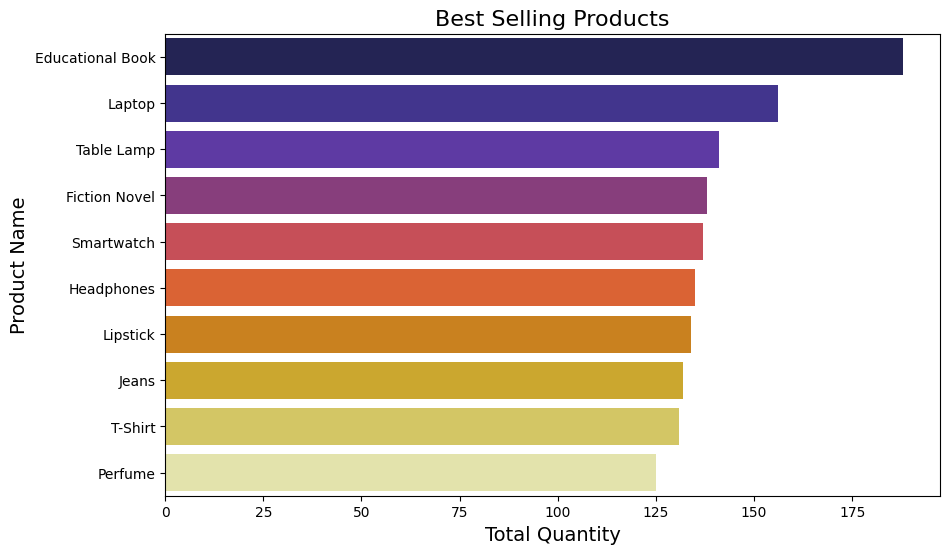

In [30]:
top_sales = FS.groupby("Product Name")["Quantity Sold"].sum().nlargest(10).sort_values(ascending=False)

#Create a horizontal bar plot
plt.figure(figsize=(10, 6))
sns.barplot( x=top_sales.values, y=top_sales.index, palette="CMRmap" )

#Add a title and labels
plt.title("Best Selling Products", fontsize=16 )
plt.xlabel("Total Quantity", fontsize=14)
plt.ylabel("Product Name", fontsize=14)

plt.show()

Top 10 Rating Products

<ipython-input-31-b3e41e076e07>:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot( x="Product Rating", y='Product Name',data=top_rate, palette="CMRmap" , ci= None)
<ipython-input-31-b3e41e076e07>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot( x="Product Rating", y='Product Name',data=top_rate, palette="CMRmap" , ci= None)


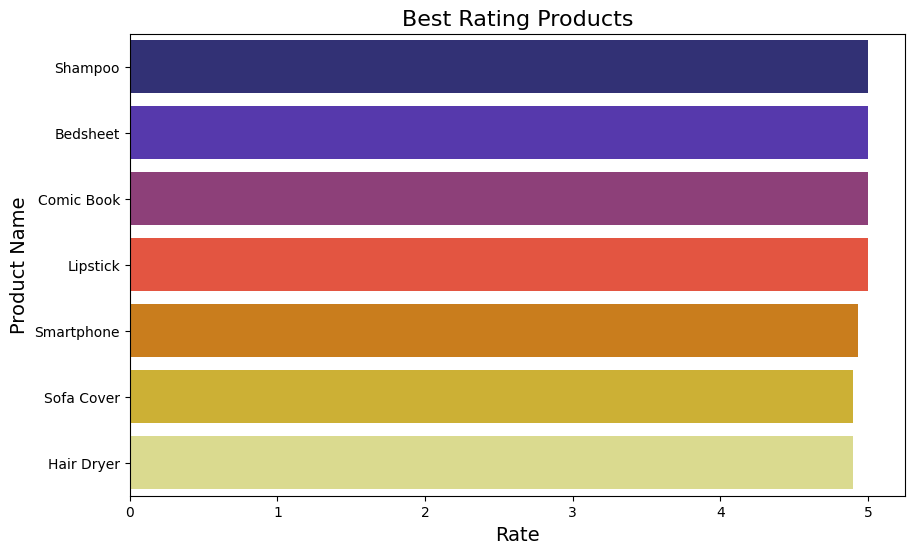

In [31]:
top_rate = FS.nlargest(10,'Product Rating').sort_values('Product Rating',ascending=False)

plt.figure(figsize=(10,6))

sns.barplot( x="Product Rating", y='Product Name',data=top_rate, palette="CMRmap" , ci= None)

#Add a title and labels
plt.title("Best Rating Products", fontsize=16)
plt.xlabel("Rate", fontsize=14)
plt.ylabel("Product Name", fontsize=14)

plt.show()

Top Sales/Category

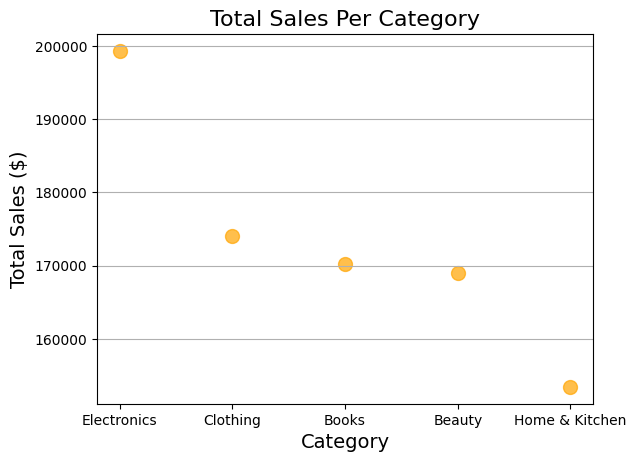

In [32]:
sales_per_category = FS.groupby('Category')['Total Sales (USD)'].sum().sort_values(ascending=False)
colors = np.array([ 10, 80, 90, 200, 100])

plt.scatter(sales_per_category.index,sales_per_category.values,color='orange',s=100, alpha= 0.7)

plt.title("Total Sales Per Category", fontsize=16)
plt.xlabel("Category",fontsize=14)
plt.ylabel("Total Sales ($)",fontsize=14)
plt.grid(axis='y')

plt.show()

<ipython-input-33-0579ab13b7a7>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x= totalQuantity.values, y= totalQuantity.index ,palette="CMRmap")


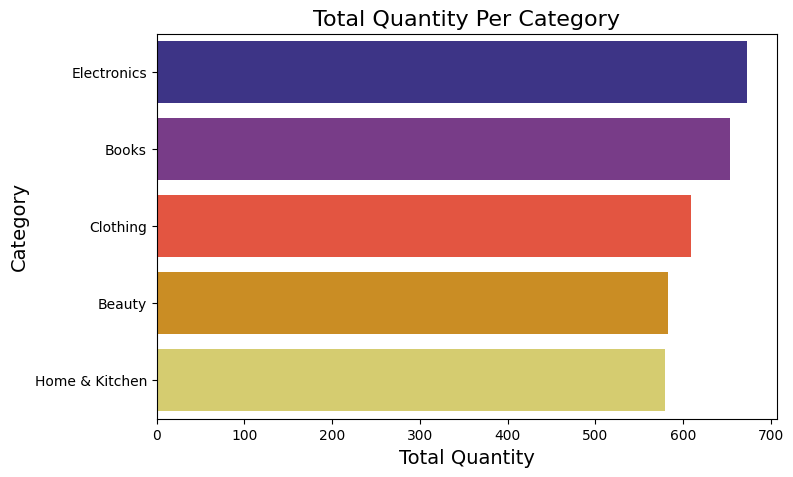

In [33]:
totalQuantity = FS.groupby('Category')['Quantity Sold'].sum().sort_values(ascending=False)

plt.figure(figsize=(8,5))

sns.barplot(x= totalQuantity.values, y= totalQuantity.index ,palette="CMRmap")

plt.title("Total Quantity Per Category" , fontsize=16)
plt.xlabel("Total Quantity", fontsize=14)
plt.ylabel("Category", fontsize=14)

plt.show()

Sales Trend over Time

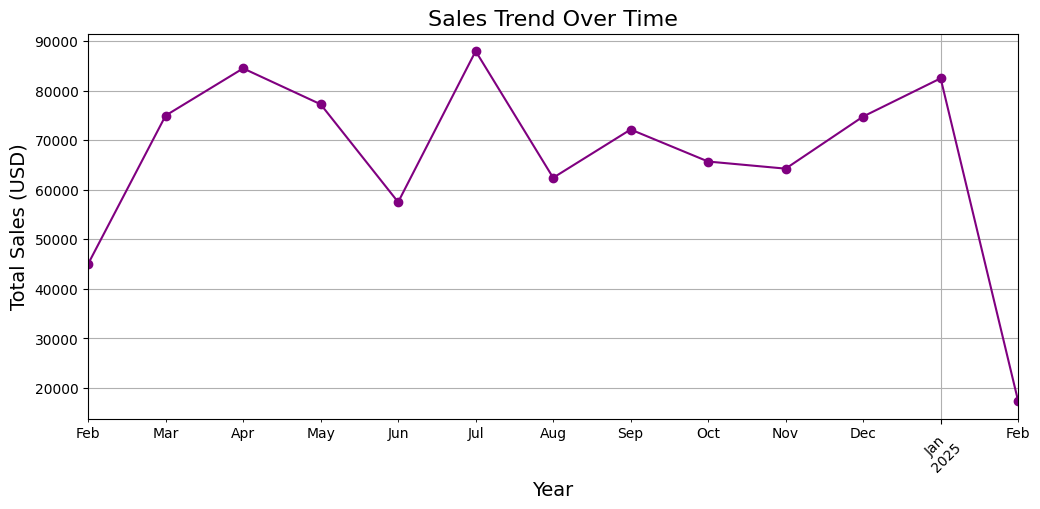

In [34]:
FS['Year'] = FS['Order Date'].dt.year
FS['Month'] = FS['Order Date'].dt.month

FS['Year-Month'] = FS['Order Date'].dt.to_period('M')
# DateOverYears
sales_per_year = FS.groupby('Year-Month')['Total Sales (USD)'].sum()
# Plt
plt.figure(figsize=(12,5))
sales_per_year.plot(kind='line', marker='o', linestyle='-', color='Purple')
plt.xlabel("Year" ,fontsize=14)
plt.ylabel("Total Sales (USD)",fontsize=14)
plt.title("Sales Trend Over Time",fontsize=16)
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

Most Used Payment Method


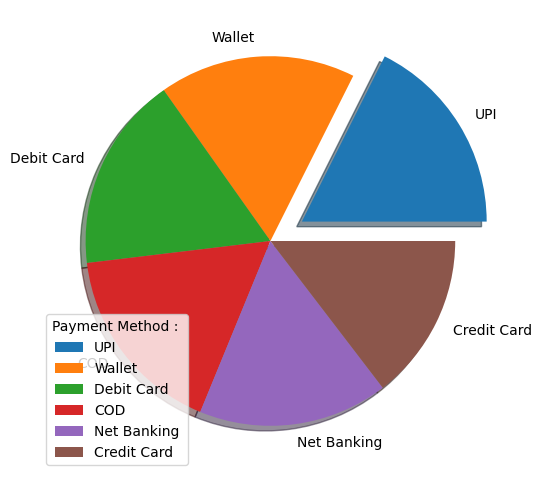

In [36]:
MostPayMethod= FS['Payment Method'].value_counts()

plt.figure(figsize=(20,6))

plt.pie(
        MostPayMethod.values,
        labels=MostPayMethod.index,
        shadow=True,
        explode=[0.2,0,0,0,0,0]
        )

plt.legend(title= "Payment Method : ")
plt.show()

Distribution of Product Rating & Price

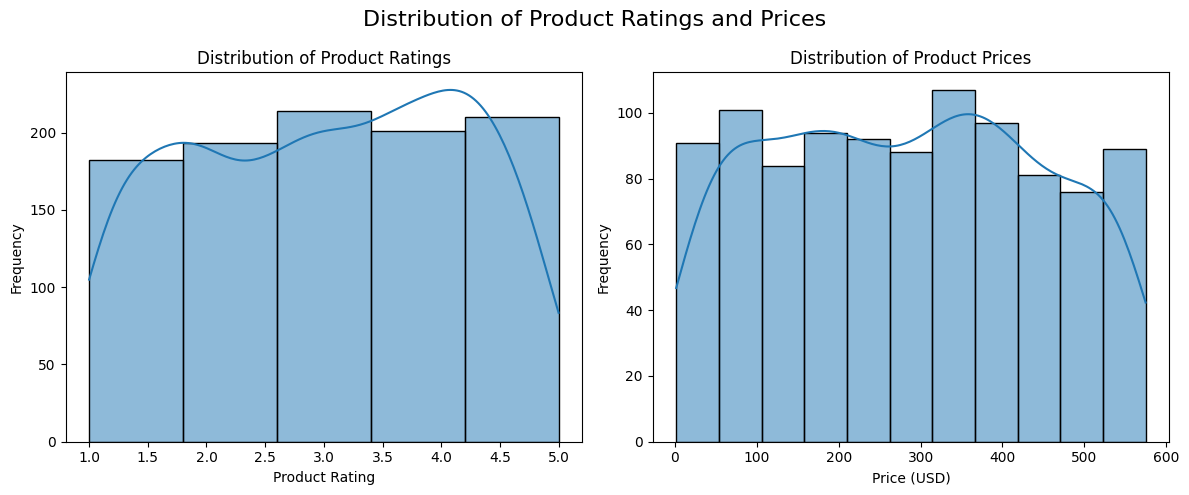

In [39]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
fig.suptitle('Distribution of Product Ratings and Prices', fontsize=16)

# Plot 1: Distribution of Product Ratings
sns.histplot(FS['Product Rating'], bins=5, kde=True, ax=axes[0])
axes[0].set_title('Distribution of Product Ratings')
axes[0].set_xlabel('Product Rating')
axes[0].set_ylabel('Frequency')

# Plot 2: Distribution of Product Prices
sns.histplot(FS['Price (USD)'], kde=True, ax=axes[1])
axes[1].set_title('Distribution of Product Prices')
axes[1].set_xlabel('Price (USD)')
axes[1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

Preformance

In [40]:
# Category
category_performance = FS.groupby('Category').agg({'Quantity Sold': 'sum', 'Total Sales (USD)': 'sum'})
category_performance.columns=['Quantity Sold' ,'Total Sales (USD)']
category_performance

,Quantity Sold,Total Sales (USD)
Category,,
Beauty,583,169053.28
Books,653,170264.39
Clothing,609,174048.72
Electronics,673,199299.51
Home & Kitchen,579,153445.59


In [41]:
# Product
product_rate = FS.groupby('Product Name').agg({'Quantity Sold': 'sum', 'Total Sales (USD)': 'sum'})
product_rate.columns=['Quantity Sold','Total Sales (USD)']
product_rate

,Quantity Sold,Total Sales (USD)
Product Name,,
Bedsheet,89,21693.29
Comic Book,120,22322.21
Cookbook,92,28951.85
Cookware Set,120,28679.77
Dress,100,28534.44
Educational Book,188,52073.43
Face Cream,124,41994.67
Fiction Novel,138,36538.43
Hair Dryer,108,28847.67


In [42]:
FS.drop(['Order Date','Payment Method','Product Name','Quantity Sold','Category','Year','Month','Year-Month'],axis=1,inplace=True)
FS.head()

,Order ID,Price (USD),Total Sales (USD),Product Rating
0,ORD00001,565.06,1130.11,3.5
1,ORD00002,146.89,587.56,3.9
2,ORD00003,127.73,510.93,4.4
3,ORD00004,376.07,376.07,3.2
4,ORD00005,306.20,918.59,3.1


In [43]:
def remove_outliers_iqr(FS, columns):
    for col in columns:
        Q1 = FS[col].quantile(0.25)
        Q3 = FS[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Filter out outliers
        FS1 = FS[(FS[col] >= lower_bound) & (FS[col] <= upper_bound)]

    return FS

# Example usage
FS = remove_outliers_iqr(FS ,['Price (USD)','Total Sales (USD)'])

Standard Scaler

In [47]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
FS['Price (USD)']=scaler.fit_transform(FS[['Price (USD)']])
FS['Total Sales (USD)']=scaler.fit_transform(FS[['Total Sales (USD)']])
FS['Product Rating']=scaler.fit_transform(FS[['Product Rating']])

In [48]:
from sklearn.model_selection import train_test_split
X=FS.drop('Product Rating',axis=1)
y=FS['Product Rating']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

In [52]:
# Before creating X_train and X_test, select only numerical features from FS:
numerical_features = FS.select_dtypes(include=['number']).columns
X = FS[numerical_features].drop('Product Rating', axis=1)
y = FS['Product Rating']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Continue with the model training:
randomforest = RandomForestRegressor()
randomforest.fit(X_train, y_train)
y_pred = randomforest.predict(X_test)

In [53]:
mse=mean_squared_error(y_test,y_pred)
r2=r2_score(y_test,y_pred)
print('Mean Squared Error:',mse)
print('R2 Score:',r2)

Mean Squared Error: 1.3311793637399445
R2 Score: -0.36818507566933456


In [62]:
# SVM Model
svm_model = SVR()
svm_model.fit(X_train, y_train)
svm_y_pred = svm_model.predict(X_test)
svm_mse = mean_squared_error(y_test, svm_y_pred)
svm_r2 = r2_score(y_test, svm_y_pred)
print('SVM Mean Squared Error:', svm_mse)
print('SVM R2 Score:', svm_r2)

# Boosting Model (Gradient Boosting)
boosting_model = GradientBoostingRegressor()
boosting_model.fit(X_train, y_train)
boosting_y_pred = boosting_model.predict(X_test)
boosting_mse = mean_squared_error(y_test, boosting_y_pred)
boosting_r2 = r2_score(y_test, boosting_y_pred)
print('Boosting Mean Squared Error:', boosting_mse)
print('Boosting R2 Score:', boosting_r2)


SVM Mean Squared Error: 0.9930688993731988
SVM R2 Score: -0.020675413279028998
Boosting Mean Squared Error: 1.026491980898704
Boosting R2 Score: -0.05502762949548279


In [66]:
# Linear Regression Model
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
linear_y_pred = linear_model.predict(X_test)
linear_mse = mean_squared_error(y_test, linear_y_pred)
linear_r2 = r2_score(y_test, linear_y_pred)
print('Linear Regression Mean Squared Error:', linear_mse)
print('Linear Regression R2 Score:', linear_r2)

# Create a DataFrame for model comparison
model_comparison = pd.DataFrame({
    'Model': ['Random Forest', 'SVM', 'Gradient Boosting', 'Linear Regression'],
    'MSE': [mse, svm_mse, boosting_mse, linear_mse],
    'R-squared': [r2, svm_r2, boosting_r2, linear_r2]
})

model_comparison


Linear Regression Mean Squared Error: 0.9997854660013562
Linear Regression R2 Score: -0.027578695038570356


,Model,MSE,R-squared
0,Random Forest,1.331179,-0.368185
1,SVM,0.993069,-0.020675
2,Gradient Boosting,1.026492,-0.055028
3,Linear Regression,0.999785,-0.027579


Comparing model to actual data set

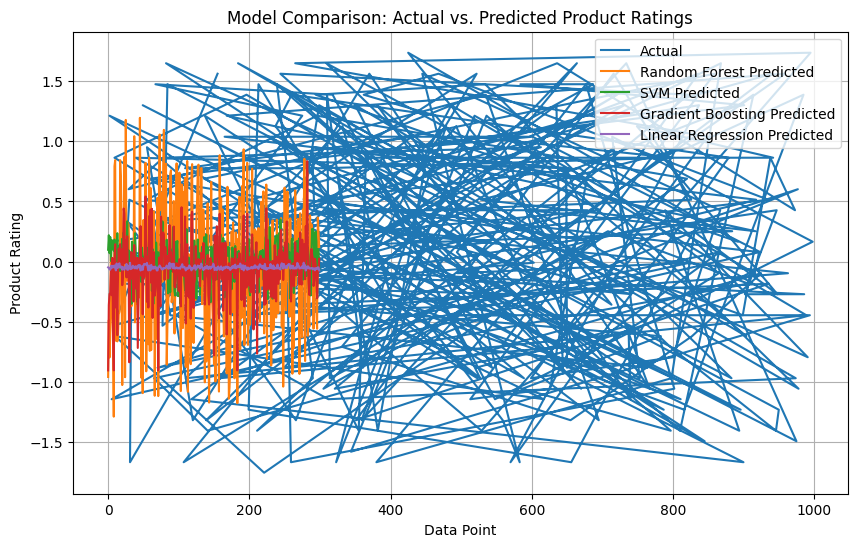

In [79]:
plt.figure(figsize=(10, 6))
plt.plot(y_test, label='Actual')
plt.plot(y_pred, label='Random Forest Predicted')
plt.plot(svm_y_pred, label='SVM Predicted')
plt.plot(boosting_y_pred, label='Gradient Boosting Predicted')
plt.plot(linear_y_pred, label='Linear Regression Predicted')
plt.xlabel("Data Point")
plt.ylabel("Product Rating")
plt.title("Model Comparison: Actual vs. Predicted Product Ratings")
plt.legend()
plt.grid(True)
plt.show()


Choosing model


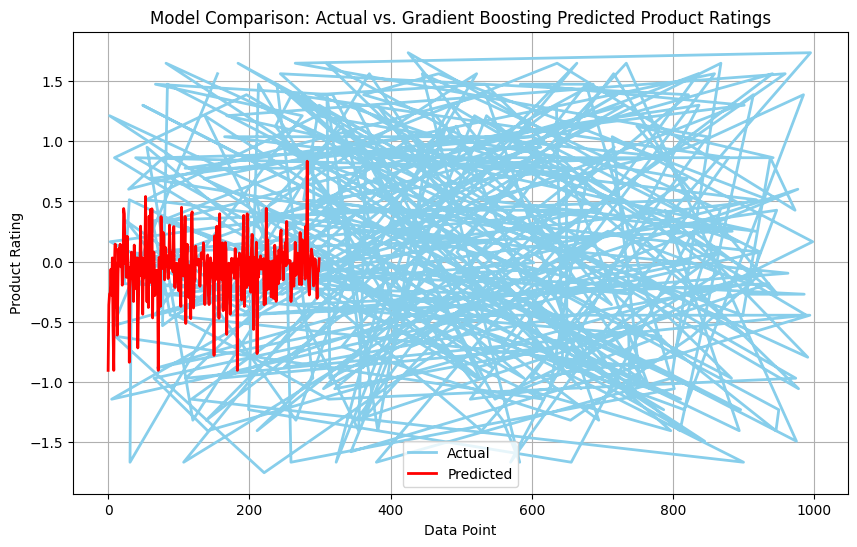

In [85]:
model_choice = "Gradient Boosting" #@param ["Random Forest", "SVM", "Gradient Boosting", "Linear Regression"]

plt.figure(figsize=(10, 6))
plt.plot(y_test, label='Actual', color='skyblue', linewidth=2)

if model_choice == "Random Forest":
  plt.plot(y_pred, label='Predicted', color='orange', linewidth=2)
elif model_choice == "SVM":
  plt.plot(svm_y_pred, label='Predicted', color='green', linewidth=2)
elif model_choice == "Gradient Boosting":
  plt.plot(boosting_y_pred, label='Predicted', color='red', linewidth=2)
elif model_choice == "Linear Regression":
  plt.plot(linear_y_pred, label='Predicted', color='purple', linewidth=2)

plt.xlabel("Data Point")
plt.ylabel("Product Rating")
plt.title(f"Model Comparison: Actual vs. {model_choice} Predicted Product Ratings")
plt.legend()
plt.grid(True)
plt.show()


Model vs R-Squared

<ipython-input-72-36957903f1ec>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(model_comparison, x='R-squared', y='Model', inner='stick', palette='Dark2')


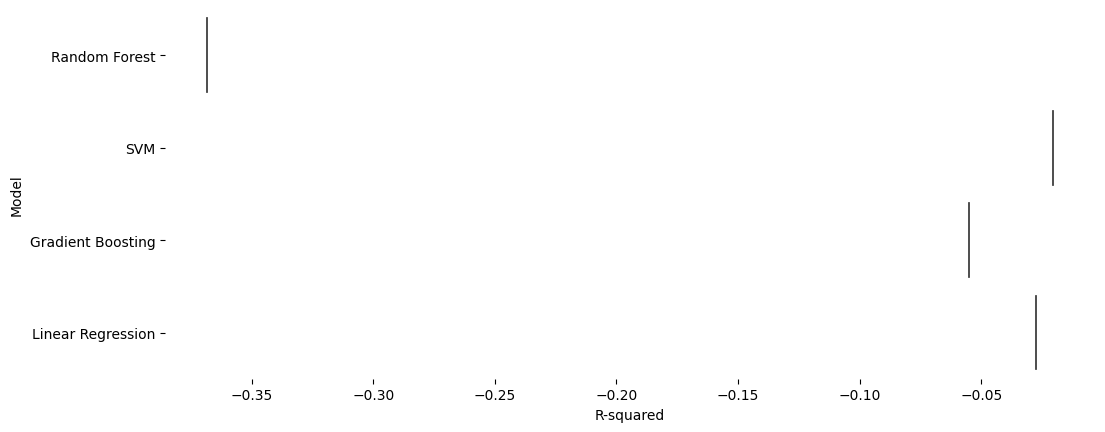

In [72]:
figsize = (12, 1.2 * len(model_comparison['Model'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(model_comparison, x='R-squared', y='Model', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

Model vs MSE

<ipython-input-70-3b1e56608b1d>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(model_comparison, x='MSE', y='Model', inner='stick', palette='Dark2')


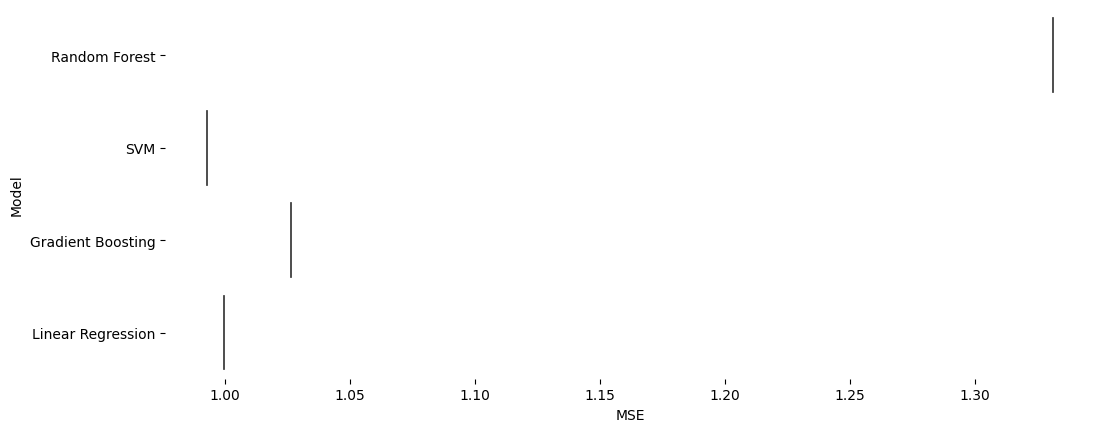

In [70]:
figsize = (12, 1.2 * len(model_comparison['Model'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(model_comparison, x='MSE', y='Model', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)